In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rna_data = pd.read_csv('data/rna_celline.tsv.gz', delimiter='\t')
rna_data.head(5)

,Gene,Gene name,Cell line,TPM,pTPM,NX
0,ENSG00000000003,TSPAN6,A-431,27.8,33.9,7.8
1,ENSG00000000003,TSPAN6,A549,37.6,45.5,10.5
2,ENSG00000000003,TSPAN6,AF22,108.1,134.5,28.3
3,ENSG00000000003,TSPAN6,AN3-CA,51.8,64.4,14.3
4,ENSG00000000003,TSPAN6,ASC diff,32.3,37.4,12.4


In [8]:
rna_pivot = rna_data.groupby(['Cell line', 'Gene name']).mean().reset_index()
n_cl = len(rna_pivot['Cell line'].unique())
print(f'{n_cl} cell lines')

rna_pivot = rna_pivot.pivot(index='Cell line', values='TPM', columns='Gene name')
print(rna_pivot.head(5))
# need to do this using numpy, so caching index and col names
index = rna_pivot.index
cols = rna_pivot.columns

# convert from ratio to fold change (-inf to +inf rather than 0 to inf)
rna_pivot = rna_pivot.values
rna_pivot[rna_pivot>1] = np.log10(rna_pivot[rna_pivot>1])
rna_pivot[rna_pivot<1] = -1/np.log10(rna_pivot[rna_pivot<1])

rna_pivot = pd.DataFrame(rna_pivot, index=index, columns=cols)
with pd.option_context('mode.use_inf_as_null', True):
    rna_pivot.dropna(0, 'any', inplace=True)

64 cell lines
Gene name  A1BG  A1CF    A2M  A2ML1  A3GALT2  A4GALT  A4GNT  AAAS  AACS  \
Cell line                                                                 
A-431       0.0   0.0    0.3    0.0      0.0     1.0    0.0  22.6  22.8   
A549        0.3   0.3    0.0    0.0      0.0    12.3    0.5  69.9  23.2   
AF22        0.0   0.0  726.2    0.1      0.0     0.0    0.0  58.4  10.8   
AN3-CA      0.6   0.0    0.0    0.1      0.0     0.0    0.0  33.9  13.8   
ASC TERT1   0.1   0.0   10.9    0.0      0.0    21.7    0.0  23.2  17.9   

Gene name  AADAC  ...  ZW10  ZWILCH  ZWINT  ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B  \
Cell line         ...                                                          
A-431        0.0  ...  19.7    33.3  172.1   1.5   4.4  13.0     0.0     9.6   
A549         7.2  ...  12.8    43.8  139.0   1.4   5.4   6.8     1.8     8.9   
AF22         0.0  ...  28.1    57.9  105.7   0.5   3.8   9.2     0.3    12.1   
AN3-CA       0.0  ...  18.6    48.0  111.1   1.7   4.7   8.1

C:\Users\pinojc\miniconda3\envs\MOA_37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


In [3]:
print(rna_pivot.head(5))
print(rna_pivot.shape)

Gene name  A1BG  A1CF    A2M  A2ML1  A3GALT2  A4GALT  A4GNT  AAAS  AACS  \
Cell line                                                                 
A-431       0.0   0.0    0.3    0.0      0.0     1.0    0.0  22.6  22.8   
A549        0.3   0.3    0.0    0.0      0.0    12.3    0.5  69.9  23.2   
AF22        0.0   0.0  726.2    0.1      0.0     0.0    0.0  58.4  10.8   
AN3-CA      0.6   0.0    0.0    0.1      0.0     0.0    0.0  33.9  13.8   
ASC TERT1   0.1   0.0   10.9    0.0      0.0    21.7    0.0  23.2  17.9   

Gene name  AADAC  ...  ZW10  ZWILCH  ZWINT  ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B  \
Cell line         ...                                                          
A-431        0.0  ...  19.7    33.3  172.1   1.5   4.4  13.0     0.0     9.6   
A549         7.2  ...  12.8    43.8  139.0   1.4   5.4   6.8     1.8     8.9   
AF22         0.0  ...  28.1    57.9  105.7   0.5   3.8   9.2     0.3    12.1   
AN3-CA       0.0  ...  18.6    48.0  111.1   1.7   4.7   8.1     0.0    14

C:\Users\pinojc\miniconda3\envs\MOA_37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot()
sns.heatmap(
    rna_pivot,
    ax= ax,
    center=1,
    cmap=sns.color_palette("bwr", 21),
#     linewidths=0.01,
    vmax=10,
    vmin=-11,
);
plt.savefig('heatmap_all_cellline.png', bbox_inches='tight')

In [11]:
ccle_mirna = pd.read_csv('data/ccle/CCLE_RNAseq_genes_rpkm_20180929.gct',
                         delimiter='\t', skiprows=2)

print(f"{len(ccle_mirna['Description'].unique())} cell lines")

54271 cell lines


In [10]:
ccle_mirna.head(5)

,Name,Description,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
0,ENSG00000223972.4,DDX11L1,0.053448,0.043078,0.037956,0.028313,0.009377,0.004012,0.017452,0.013608,...,0.180119,0.102898,0.354700,0.418945,0.270819,0.096412,0.116833,0.025481,0.124122,0.030062
1,ENSG00000227232.4,WASH7P,5.752560,4.261040,3.100480,3.079090,3.994940,3.356750,2.569410,3.025490,...,5.420360,2.323580,5.666570,2.795510,2.432770,3.703760,3.163270,3.983540,4.601320,4.563500
2,ENSG00000243485.2,MIR1302-11,0.039576,0.011961,0.031618,0.031446,0.020831,0.053476,0.029075,0.040305,...,0.244510,0.114286,0.472748,0.572692,0.481268,0.091785,0.070780,0.011320,0.127255,0.055648
3,ENSG00000237613.2,FAM138A,0.037400,0.022608,0.013280,0.026416,0.006562,0.022461,0.018318,0.006348,...,0.196060,0.164578,0.384714,0.285641,0.363853,0.077102,0.104051,0.000000,0.133623,0.028048
4,ENSG00000268020.2,OR4G4P,0.000000,0.019401,0.025642,0.008501,0.008447,0.000000,0.007860,0.016343,...,0.144213,0.039722,0.239619,0.135462,0.097575,0.037218,0.095669,0.036722,0.051601,0.018052


In [12]:
ccle_mirna.set_index('Description', inplace=True)
ccle_mirna.drop('Name', axis=1, inplace=True)
ccle_mirna.head(5)

,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.053448,0.043078,0.037956,0.028313,0.009377,0.004012,0.017452,0.013608,0.018103,0.029810,...,0.180119,0.102898,0.354700,0.418945,0.270819,0.096412,0.116833,0.025481,0.124122,0.030062
WASH7P,5.752560,4.261040,3.100480,3.079090,3.994940,3.356750,2.569410,3.025490,2.787330,2.988130,...,5.420360,2.323580,5.666570,2.795510,2.432770,3.703760,3.163270,3.983540,4.601320,4.563500
MIR1302-11,0.039576,0.011961,0.031618,0.031446,0.020831,0.053476,0.029075,0.040305,0.040212,0.018919,...,0.244510,0.114286,0.472748,0.572692,0.481268,0.091785,0.070780,0.011320,0.127255,0.055648
FAM138A,0.037400,0.022608,0.013280,0.026416,0.006562,0.022461,0.018318,0.006348,0.012667,0.017880,...,0.196060,0.164578,0.384714,0.285641,0.363853,0.077102,0.104051,0.000000,0.133623,0.028048
OR4G4P,0.000000,0.019401,0.025642,0.008501,0.008447,0.000000,0.007860,0.016343,0.000000,0.015343,...,0.144213,0.039722,0.239619,0.135462,0.097575,0.037218,0.095669,0.036722,0.051601,0.018052


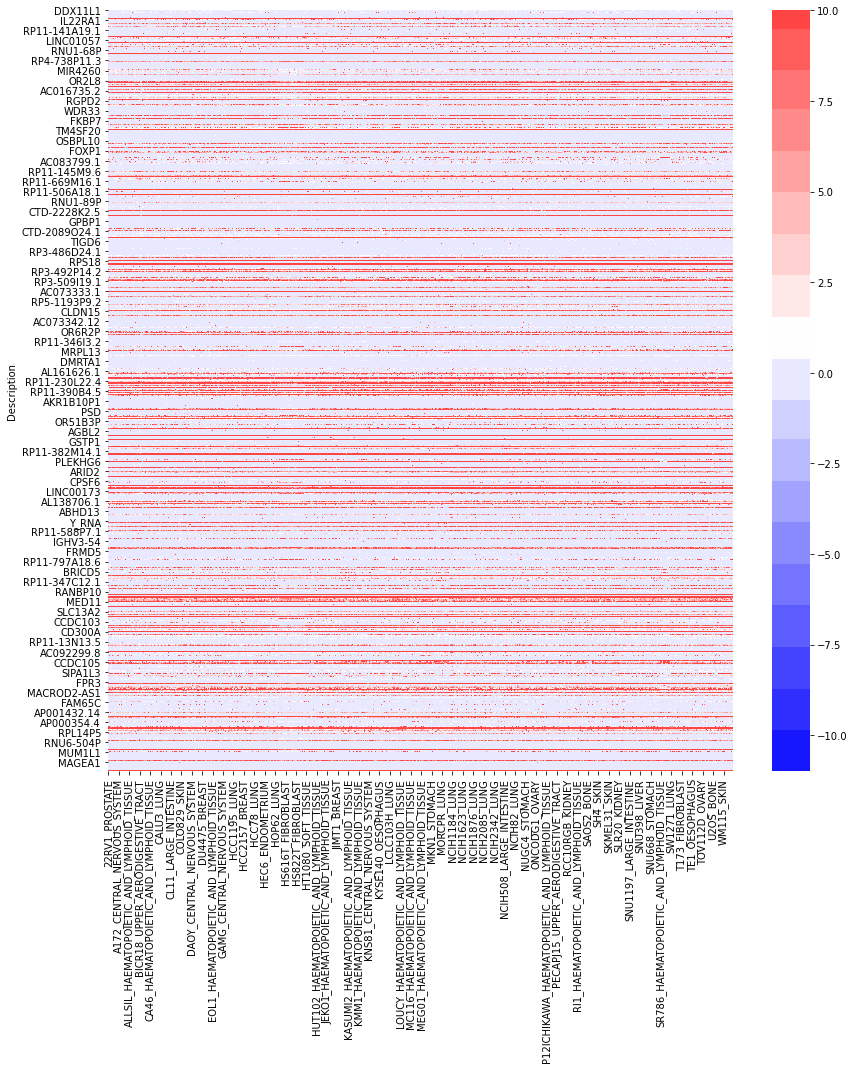

In [14]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot()
sns.heatmap(
    ccle_mirna,
    ax= ax,
    center=1,
    cmap=sns.color_palette("bwr", 21),
#     linewidths=0.01,
    vmax=10,
    vmin=-11,
);
plt.savefig('heatmap_ccle_rna.png', bbox_inches='tight')

Load in IC50 data

In [15]:
ic50_all = pd.read_csv('data/GDSC1_fitted_dose_response_25Feb20.csv.gz')

# ic50 = ic50_all.loc[ic50_all.DRUG_NAME.isin(['rTRAIL'])]
# cols = ['CELL_LINE_NAME', 'LN_IC50']
# ic50 = ic50[cols]
ic50_all.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.395685,0.982114,0.022521,-0.189576
1,GDSC1,281,12975300,684055,ES3,SIDM00265,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.140923,0.984816,0.031840,0.508635
2,GDSC1,281,12975647,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.968757,0.985693,0.026052,1.284229
3,GDSC1,281,12975980,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692768,0.972699,0.110056,0.088760
4,GDSC1,281,12976330,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.478678,0.944462,0.087011,-0.111820


In [ ]:
ic50_all[['CELL_LINE_NAME', 'DRUG_NAME', 'LN_IC50']].head(5)
ic50_all = ic50_all.groupby(['CELL_LINE_NAME', 'DRUG_NAME']).mean().reset_index()

ic50_all.head(5)

In [18]:
print(len(ic50_all.CELL_LINE_NAME.unique()), len(ic50_all.DRUG_NAME.unique()))

987 345


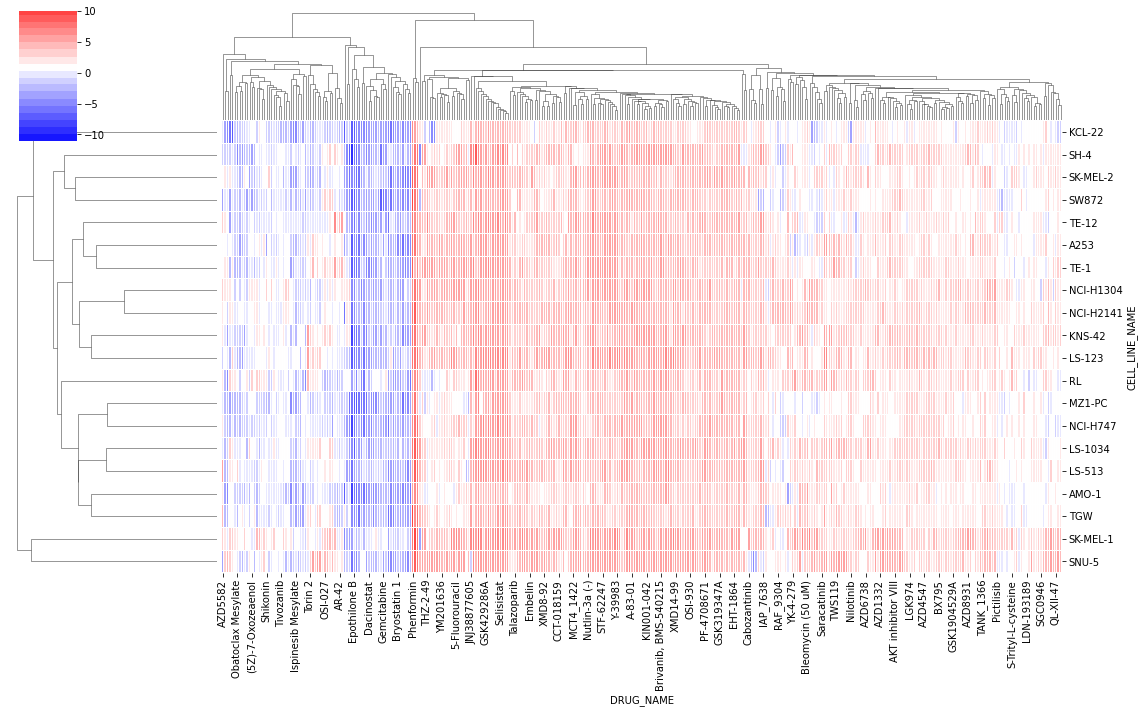

In [16]:
ic50_pivot = ic50_all.pivot(index='CELL_LINE_NAME', values='LN_IC50', columns='DRUG_NAME')
with pd.option_context('mode.use_inf_as_null', True):
    ic50_pivot.dropna(0, 'any', inplace=True)
ic50_pivot.head(5)

# fig = plt.figure(figsize=(16, 10))
# ax = fig.add_subplot()
sns.clustermap(
    ic50_pivot,
    figsize=(16,10),
#     ax= ax,
    center=1,
    cmap=sns.color_palette("bwr", 21),
    linewidths=0.01,
    vmax=10,
    vmin=-11,
#     annot=True,
#     fmt="0.1f"
);
plt.savefig('heatmap_ic50_all_drugs_cell_lines.png', bbox_inches='tight')

In [21]:
# get subset of EARM only
ic50_data = pd.read_csv('data/GDSC1_fitted_dose_response_25Feb20.csv.gz')

rna_raw = rna_data.groupby(['Cell line', 'Gene name']).mean().reset_index()

rna_raw = rna_raw.pivot(index='Cell line', values='TPM', columns='Gene name')
rna_raw.head(5)

# filter to only cell lines in both
in_both = set(ic50_data.CELL_LINE_NAME.unique()).intersection(set(rna_raw.index))

# filter
to_export = to_export.loc[to_export.index.isin(in_both)]

ic50_data = ic50_data.loc[ic50_data.CELL_LINE_NAME.isin(in_both)]
ic50_data.set_index('CELL_LINE_NAME', inplace=True)

# join
combined = to_export.join(ic50_data)
combined.to_csv("combined_data.csv.gz")
combined.head(10)


KeyboardInterrupt: 

AttributeError: 'DataFrame' object has no attribute 'CELL_LINE_NAME'

In [6]:
# proteins in EARM model
genes = [
    'BAX', 'BCL2', 'BID', 'CYCS', 'FADD',
    'CASP3', 'CASP8', 'CASP9', 'CASP6',
    'CFLAR', #FLIP
    'XIAP', 
    'DIABLO', #SMAC
    'TNFRSF10A', #DR4
    'TNFRSF10B', #DR5
    'PARP1',
    'APAF1', 
    'BFAR', #BAR
        ]


C:\Users\pinojc\miniconda3\envs\MOA_37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


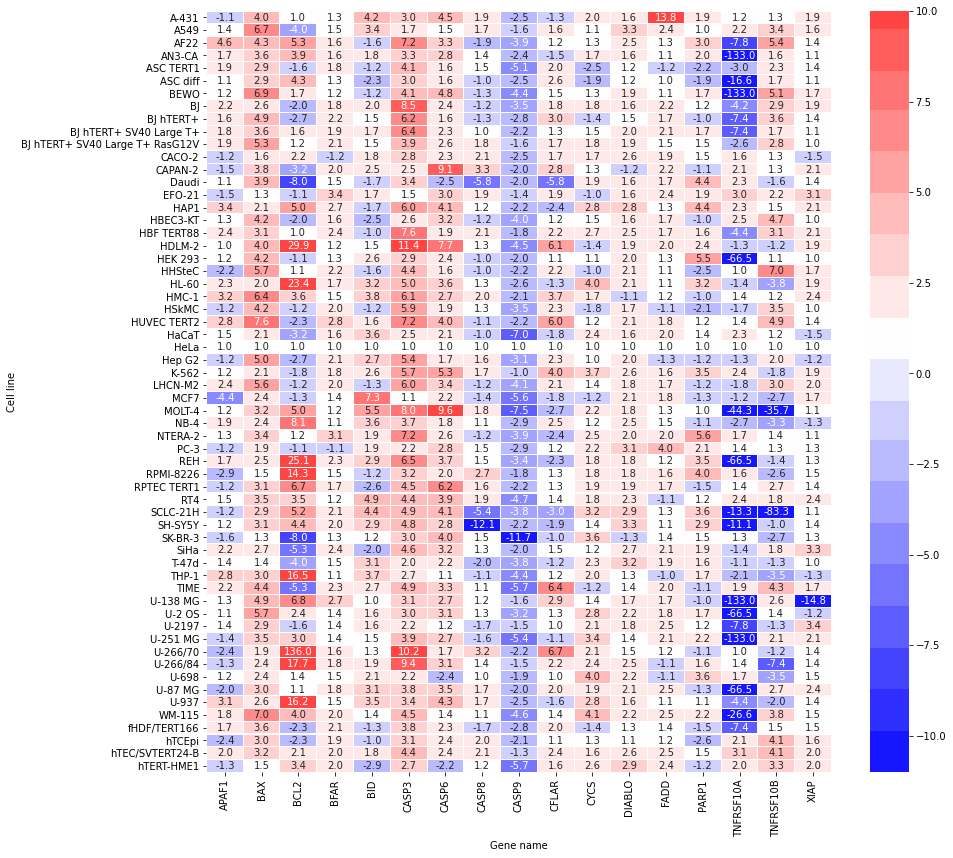

In [7]:
# get subset of EARM only
earm_subset = rna_data.loc[rna_data['Gene name'].isin(genes)].copy()
earm_subset = earm_subset.groupby(['Cell line', 'Gene name']).mean().reset_index()

# normalize by HeLa expression levels
earm_subset = earm_subset.pivot(index='Cell line', values='TPM', columns='Gene name')
earm_subset /= earm_subset.loc[earm_subset.index=='HeLa'].values

# need to do this using numpy, so caching index and col names
index = earm_subset.index
cols = earm_subset.columns

# convert from ratio to fold change (-inf to +inf rather than 0 to inf)
earm_subset = earm_subset.values
earm_subset[earm_subset<1] = -1/earm_subset[earm_subset<1]

earm_subset = pd.DataFrame(earm_subset, index=index, columns=cols)
with pd.option_context('mode.use_inf_as_null', True):
    earm_subset.dropna(0, 'any', inplace=True)
    
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot()
sns.heatmap(
    earm_subset,
    ax= ax,
    center=1,
    cmap=sns.color_palette("bwr", 21),
    linewidths=0.01,
    vmax=10,
    vmin=-11,
    annot=True,
    fmt="0.1f"
);
plt.savefig('heatmap_all_cellline.png', bbox_inches='tight')

In [8]:
# get subset of EARM only
earm_subset = rna_data.loc[rna_data['Gene name'].isin(genes)].copy()
earm_subset = earm_subset.groupby(['Cell line', 'Gene name']).mean().reset_index()

# normalize by HeLa expression levels
earm_subset = earm_subset.pivot(index='Cell line', values='TPM', columns='Gene name')
# filter to only cell lines in both
in_both = set(ic50.CELL_LINE_NAME.unique()).intersection(set(earm_subset.index))

# filter
earm_subset = earm_subset.loc[earm_subset.index.isin(in_both)]
ic50 = ic50.loc[ic50.CELL_LINE_NAME.isin(in_both)]
ic50.set_index('CELL_LINE_NAME', inplace=True)

# join
combined = earm_subset.join(ic50)


earm_subset /= earm_subset.loc[earm_subset.index=='HeLa'].values

# need to do this using numpy, so caching index and col names
index = earm_subset.index
cols = earm_subset.columns

# convert from ratio to fold change (-inf to +inf rather than 0 to inf)
earm_subset = earm_subset.values
earm_subset[earm_subset<1] = -1/earm_subset[earm_subset<1]

earm_subset = pd.DataFrame(earm_subset, index=index, columns=cols)
with pd.option_context('mode.use_inf_as_null', True):
    earm_subset.dropna(0, 'any', inplace=True)

earm_subset.head(5)
earm_subset.to_csv('normalized_ratios.csv')

C:\Users\pinojc\miniconda3\envs\MOA_37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


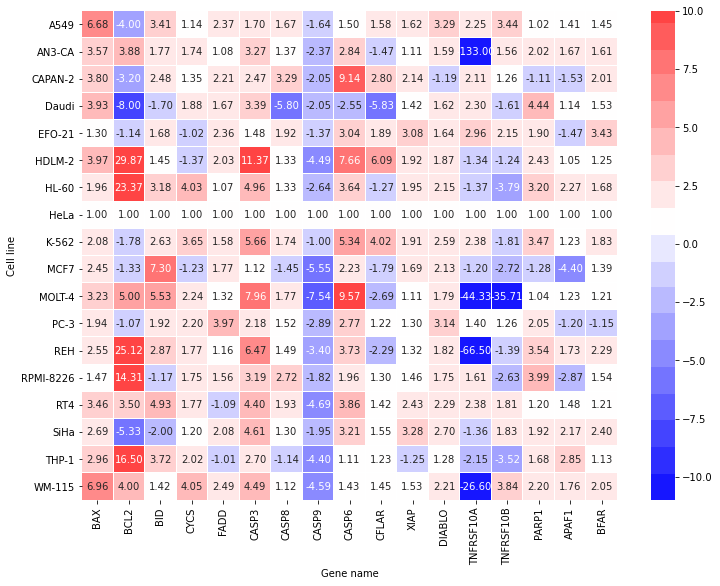

In [9]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
sns.heatmap(
    earm_subset[genes],
    ax= ax,
    center=1,
    cmap=sns.color_palette("bwr", 21),
    linewidths=0.01,
    vmax=10,
    vmin=-11,
    annot=True,
    fmt="0.2f"
);
plt.savefig('heatmap_filtered_by_cellline.png', bbox_inches='tight')

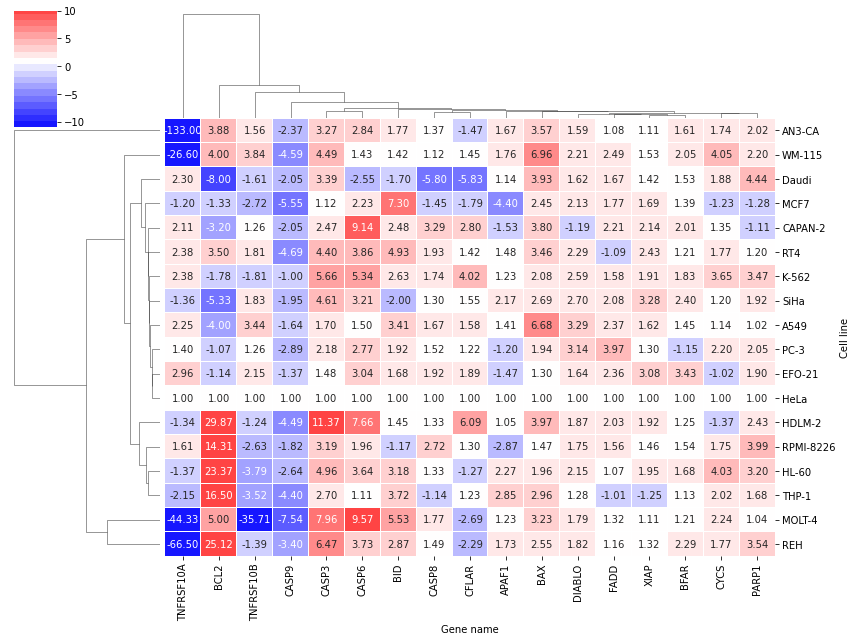

In [12]:
sns.clustermap(
    
    earm_subset[genes],
    col_cluster=True,
    figsize=(12,9),
    center=1,
    cmap=sns.color_palette("bwr", 21),
    linewidths=0.01,
    vmax=10,
    vmin=-11,
    annot=True,
    fmt="0.2f"
);
plt.savefig('earm_only_by_cell_line.png', bbox_inches='tight')

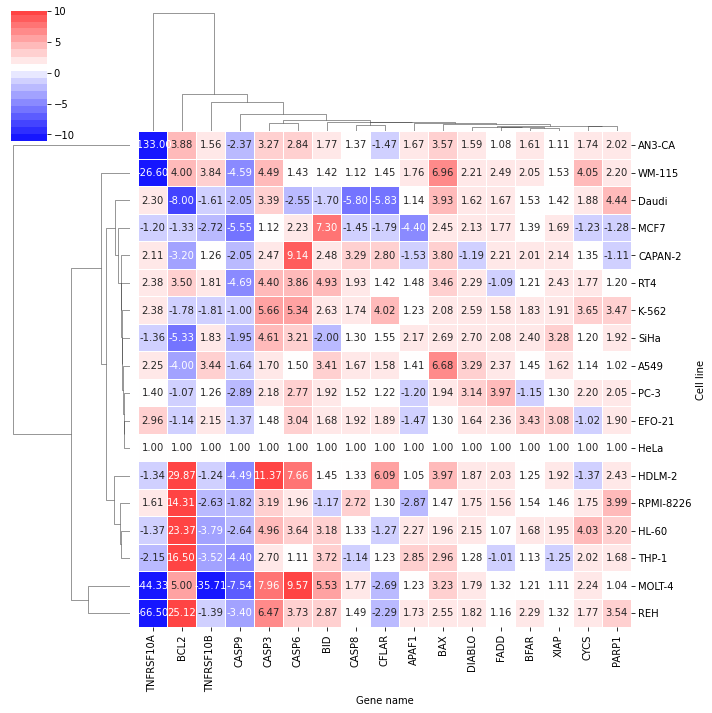

In [13]:
sns.clustermap(
    earm_subset,
    figsize=(10, 10),
    center=1,
    cmap=sns.color_palette("bwr", 21),
    linewidths=0.01,
    vmax=10,
    vmin=-11,
    annot=True,
    fmt="0.2f"
);

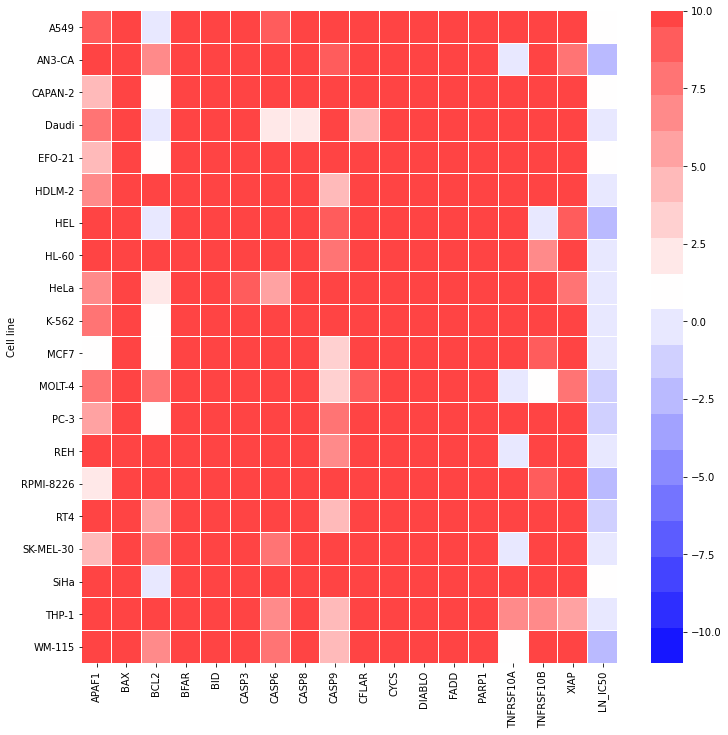

In [14]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
sns.heatmap(
    combined,
    ax= ax,
    center=1,
    cmap=sns.color_palette("bwr", 21),
    linewidths=0.01,
    vmax=10,
    vmin=-11,
#     annot=True,
#     fmt="0.2f"
);

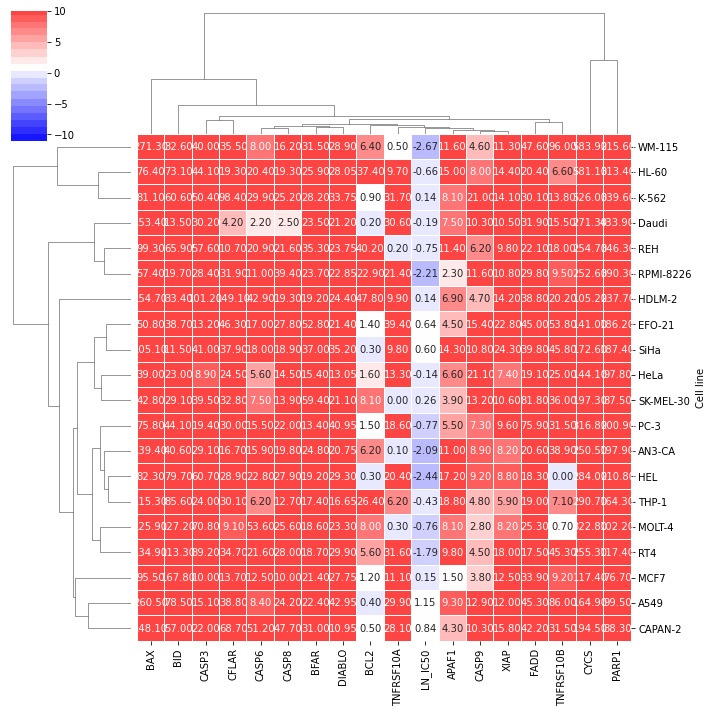

In [15]:
sns.clustermap(
    combined,
    figsize=(10, 10),
    center=1,
    cmap=sns.color_palette("bwr", 21),
    linewidths=0.01,
    vmax=10,
    vmin=-11,
    annot=True,
    fmt="0.2f"
);

Cell line
A549         2.214984
CAPAN-2      1.792504
EFO-21       1.559356
SiHa         1.513392
SK-MEL-30    1.193850
Name: IC50, dtype: float64


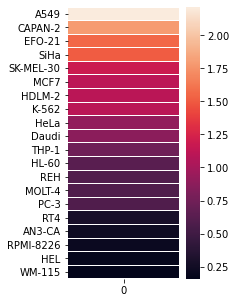

In [16]:
combined['IC50'] = np.exp2(combined['LN_IC50'])
sorted_array = combined['IC50'].sort_values(ascending=False)
print(sorted_array.head(5))
fig = plt.figure(figsize=(2.5, 5))
ax = fig.add_subplot()
sns.heatmap(
    sorted_array.values.reshape(len(sorted_array.values), 1),
    ax=ax,
    linewidths=0.01
)
yticks = list(range(0, combined.shape[0]))
yticks = [i+.5 for i in yticks]
plt.yticks(yticks, sorted_array.index, rotation=0);
# plt.colorbar()
plt.savefig('ic50_drug.png', bbox_inches='tight', dpi=300)

In [17]:
combined['LN_IC50'] /=  combined[combined.index=='HeLa']['LN_IC50'].values[0]
print(combined['LN_IC50'].values)

[-8.11406263 14.78983847 -5.95473705  1.37300207 -4.53301366 -0.9991301
 17.22146312  4.683223    1.         -0.96869077 -1.09500976  5.37345469
  5.42790461  5.2693004  15.63812272 12.68774223 -1.80784463 -4.22774336
  3.04696031 18.86298057]


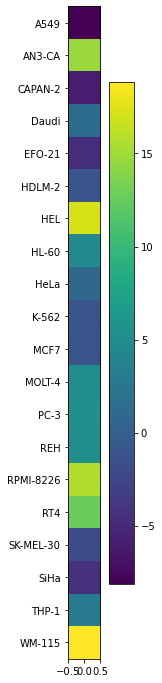

In [18]:
fig = plt.figure(figsize=(3, 12))
ax = plt.imshow(combined['LN_IC50'].values.reshape(len(combined['LN_IC50'].values), 1))
plt.yticks(range(combined.shape[0]), combined.index);
plt.colorbar()
# plt.xticks(range(ic50.shape[1]), ic50.columns, rotation=90);